In [1]:
from ptgnn.dataset import RSDataset

In [2]:
rs = RSDataset(split='val')

In [3]:
import pandas as pd
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol

In [4]:
df = pd.read_pickle("src/rs/raw/train.pickle")

In [5]:
display(df)

,ID,SMILES_nostereo,rdkit_mol_cistrans_stereo,RS_label,RS_label_binary
0,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x000002491BE...,S,1
1,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x000002491BE...,S,1
2,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x000002491BE...,S,1
3,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x000002491BE...,S,1
4,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x000002491BE...,S,1
...,...,...,...,...,...
326860,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000024A206...,R,0
326861,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000024A206...,R,0
326862,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000024A206...,R,0
326863,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000024A206...,R,0


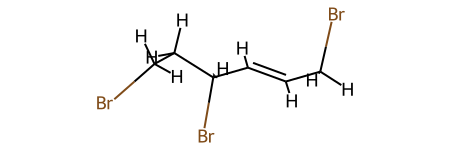

In [6]:
# mol_example = df.rdkit_mol_cistrans_stereo.iloc[6]# 0
mol_example = smiles_to_3d_mol(
    df.ID.iloc[80],
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol_example)

In [7]:
data = get_chiro_data_from_mol(mol_example)
display(data)

Data(x=[18, 52], edge_index=[2, 34], edge_attr=[34, 14], pos=[18, 3], bond_distances=[17], bond_distance_index=[2, 17], bond_angles=[30], bond_angle_index=[3, 30], dihedral_angles=[34], dihedral_angle_index=[4, 34])

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [53]:
Chem.GetAdjacencyMatrix(mol_example)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
data.edge_index.T

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 1,  9],
        [ 9,  1],
        [ 1, 10],
        [10,  1],
        [ 2,  3],
        [ 3,  2],
        [ 2, 11],
        [11,  2],
        [ 3,  4],
        [ 4,  3],
        [ 3, 12],
        [12,  3],
        [ 4,  5],
        [ 5,  4],
        [ 4,  6],
        [ 6,  4],
        [ 4, 13],
        [13,  4],
        [ 6,  7],
        [ 7,  6],
        [ 6, 14],
        [14,  6],
        [ 6, 15],
        [15,  6],
        [ 7,  8],
        [ 8,  7],
        [ 7, 16],
        [16,  7],
        [ 7, 17],
        [17,  7]])

In [55]:
# determine stereocenters
chiral_center_list = AllChem.FindMolChiralCenters(mol_example, includeUnassigned=True)
display(chiral_center_list)

[(4, 'S')]

In [56]:
chiral_center_list = [c[0] for c in chiral_center_list]
display(chiral_center_list)

[4]

In [57]:
node_mapping = {
    (1,2): 0,
    (2,3): 1,
    (3,4): 2
}

In [58]:
[
    idx
    for idx, (key, value) in enumerate(node_mapping.items())
    if key[0] in chiral_center_list
]

[]

In [59]:
(1,2) in [1,2,3,4,5]

False

In [60]:
data

Data(x=[18, 52], edge_index=[2, 34], edge_attr=[34, 14], pos=[18, 3], bond_distances=[17], bond_distance_index=[2, 17], bond_angles=[30], bond_angle_index=[3, 30], dihedral_angles=[34], dihedral_angle_index=[4, 34])

In [14]:
from ptgnn.transform.edge_graph.permutation_tree_selective import custom_to_edge_graph

# transform to edge graph using custom function
edge_graph, node_mapping = custom_to_edge_graph(
    data=data,
)

In [15]:
display(node_mapping)
display(edge_graph)

{(0, 1): 0,
 (1, 0): 1,
 (1, 2): 2,
 (2, 1): 3,
 (1, 9): 4,
 (9, 1): 5,
 (1, 10): 6,
 (10, 1): 7,
 (2, 3): 8,
 (3, 2): 9,
 (2, 11): 10,
 (11, 2): 11,
 (3, 4): 12,
 (4, 3): 13,
 (3, 12): 14,
 (12, 3): 15,
 (4, 5): 16,
 (5, 4): 17,
 (4, 6): 18,
 (6, 4): 19,
 (4, 13): 20,
 (13, 4): 21,
 (6, 7): 22,
 (7, 6): 23,
 (6, 14): 24,
 (14, 6): 25,
 (6, 15): 26,
 (15, 6): 27,
 (7, 8): 28,
 (8, 7): 29,
 (7, 16): 30,
 (16, 7): 31,
 (7, 17): 32,
 (17, 7): 33}

Data(x=[34, 118], edge_index=[2, 94], edge_attr=[94, 80], pos=[34, 6], parallel_node_index=[34], circle_index=[34])

In [16]:
import json
def _circle_index_to_primordial_tree(
        circle_index: int,
        parallel_node: int,
        self_node: int,
        inner_type: str = "Z"
):
    # if nothing in the circular index return empty string
    if len(circle_index) == 0:
        return json.dumps({"S": [
            int(self_node),
            int(parallel_node)
        ]})
    else:
        # not including parallel node index
        # return f"Z{[i for i in circle_index]}"

        # including parallel node index
        # return f"P[{parallel_node}, Z{[i for i in circle_index]}]"
        return json.dumps({
            "S": [
                int(self_node),
                int(parallel_node),
                {
                    inner_type: [int(i) for i in circle_index]
                }
            ]
        })

# produce default trees for each node
permutation_trees = [
    _circle_index_to_primordial_tree(circle_index, parallel_node, idx, inner_type="P")
    for idx, (circle_index, parallel_node) in enumerate(
        zip(
            edge_graph.circle_index,
            edge_graph.parallel_node_index
        )
    )
]
# register permutation trees in data object
edge_graph.ptree = permutation_trees

In [19]:
display(edge_graph, edge_graph.ptree)

Data(x=[34, 118], edge_index=[2, 94], edge_attr=[94, 80], pos=[34, 6], parallel_node_index=[34], circle_index=[34], ptree=[34])

['{"S": [0, 1]}',
 '{"S": [1, 0, {"P": [3, 5, 7]}]}',
 '{"S": [2, 3, {"P": [0, 7, 5]}]}',
 '{"S": [3, 2, {"P": [9, 11]}]}',
 '{"S": [4, 5, {"P": [0, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [0, 5, 3]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [2, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15]}]}',
 '{"S": [10, 11, {"P": [2, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15]}]}',
 '{"S": [13, 12, {"P": [17, 19, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13]}]}',
 '{"S": [15, 14]}',
 '{"S": [16, 17, {"P": [12, 21, 19]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 17, 21]}]}',
 '{"S": [19, 18, {"P": [23, 27, 25]}]}',
 '{"S": [20, 21, {"P": [12, 19, 17]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [18, 25, 27]}]}',
 '{"S": [23, 22, {"P": [29, 33, 31]}]}',
 '{"S": [24, 25, {"P": [18, 27, 23]}]}',
 '{"S": [25, 24]}',
 '{"S": [26, 27, {"P": [18, 23, 25]}]}',
 '{"S": [27, 26]}',
 '{"S": [28, 29, {"P": [22, 31, 33]}]}',
 '{"S": [29, 28]}',
 '{"S": [30, 31, {"P": [22, 33, 29]}]}',
 

In [18]:
from ptgnn.transform.edge_graph.permutation_tree_selective import remove_duplicate_edges_function

result_graph, result_node_mapping = remove_duplicate_edges_function(edge_graph, node_mapping)
display(result_graph, result_node_mapping)

Data(x=[17, 118], edge_index=[2, 60], edge_attr=[60, 80], ptree=[17])

{(0, 1): 0,
 (1, 2): 1,
 (1, 9): 2,
 (1, 10): 3,
 (2, 3): 4,
 (2, 11): 5,
 (3, 4): 6,
 (3, 12): 7,
 (4, 5): 8,
 (4, 6): 9,
 (4, 13): 10,
 (6, 7): 11,
 (6, 14): 12,
 (6, 15): 13,
 (7, 8): 14,
 (7, 16): 15,
 (7, 17): 16}

# Removal of duplicate edge testing

In [63]:
# determine which nodes to keep and which to discard
keep_nodes = []
discard_nodes = []

for source, target in node_mapping.keys():
    if (target, source) in keep_nodes:
        discard_nodes.append((source, target))
    else:
        keep_nodes.append((source, target))

display(keep_nodes)
display(discard_nodes)

[(0, 1),
 (1, 2),
 (1, 9),
 (1, 10),
 (2, 3),
 (2, 11),
 (3, 4),
 (3, 12),
 (4, 5),
 (4, 6),
 (4, 13),
 (6, 7),
 (6, 14),
 (6, 15),
 (7, 8),
 (7, 16),
 (7, 17)]

[(1, 0),
 (2, 1),
 (9, 1),
 (10, 1),
 (3, 2),
 (11, 2),
 (4, 3),
 (12, 3),
 (5, 4),
 (6, 4),
 (13, 4),
 (7, 6),
 (14, 6),
 (15, 6),
 (8, 7),
 (16, 7),
 (17, 7)]

In [64]:
import torch

# get indices of keep and discard
keep_idx = torch.tensor([
    node_mapping[node]
    for node in keep_nodes
])
discard_idx = torch.tensor([
    node_mapping[node]
    for node in discard_nodes
])
display(keep_idx)
display(discard_idx)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33])

In [27]:
def _replace(i: int):
    if i in keep_idx:
        return i
    else:
        return edge_graph.parallel_node_index[i]

In [74]:
edge_index = torch.tensor([
    [
        _replace(source),
        _replace(target)
    ]
    for source, target in edge_graph.edge_index.T.tolist()
]).T
display(edge_index.shape)
mask = edge_index[0] != edge_index[1]
edge_index = edge_index[:, mask]
edge_attr = edge_graph.edge_attr[mask]
display(edge_index.shape)

torch.Size([2, 94])

torch.Size([2, 60])

In [75]:
key, value = keep_idx.sort()

In [76]:
display(key, value)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [77]:
d = dict(zip(key.tolist(), value.tolist()))
edge_index = torch.tensor([[d[a], d[b]] for a,b in edge_index.T.tolist()]).T

In [78]:
display(edge_index.T)

tensor([[ 1,  0],
        [ 2,  0],
        [ 3,  0],
        [ 0,  1],
        [ 2,  1],
        [ 3,  1],
        [ 4,  1],
        [ 5,  1],
        [ 0,  2],
        [ 1,  2],
        [ 3,  2],
        [ 0,  3],
        [ 1,  3],
        [ 2,  3],
        [ 1,  4],
        [ 5,  4],
        [ 6,  4],
        [ 7,  4],
        [ 1,  5],
        [ 4,  5],
        [ 4,  6],
        [ 7,  6],
        [ 8,  6],
        [ 9,  6],
        [10,  6],
        [ 4,  7],
        [ 6,  7],
        [ 6,  8],
        [ 9,  8],
        [10,  8],
        [ 6,  9],
        [ 8,  9],
        [10,  9],
        [11,  9],
        [12,  9],
        [13,  9],
        [ 6, 10],
        [ 8, 10],
        [ 9, 10],
        [ 9, 11],
        [12, 11],
        [13, 11],
        [14, 11],
        [15, 11],
        [16, 11],
        [ 9, 12],
        [11, 12],
        [13, 12],
        [ 9, 13],
        [11, 13],
        [12, 13],
        [11, 14],
        [15, 14],
        [16, 14],
        [11, 15],
        [1

In [79]:
from ptgnn.transform.edge_graph.basic_permutation_tree import _circle_index_to_primordial_tree

permutation_trees = [
    _circle_index_to_primordial_tree(circle_index, parallel_node, idx, inner_type="P")
    for idx, (circle_index, parallel_node) in enumerate(
        zip(
            edge_graph.circle_index,
            edge_graph.parallel_node_index
        )
    )
]
# register permutation trees in data object
edge_graph.ptree = permutation_trees

In [80]:
import json
def _map_tree(tree):
    if isinstance(tree, dict):
        _map_tree(next(iter(tree.values())))
    elif isinstance(tree, list):
        for i in range(len(tree)):
            if isinstance(tree[i], int):
                tree[i] = d[int(_replace(tree[i]))]
            else:
                _map_tree(tree[i])
    return tree

def _merge_map_ptrees(tree_a, tree_b, idx):
    # get s node rooted list
    tree_a = json.loads(tree_a)['S']
    tree_b = json.loads(tree_b)['S']

    # catch cases where tree is just nonsensical
    if len(tree_a) < 3 and len(tree_b) < 3:
        return json.dumps(_map_tree({"S": [idx]}))
    elif len(tree_a) < 3:
        return json.dumps(_map_tree({
            "S": [
                idx,
                tree_b[-1]
            ]
        }))
    elif len(tree_b) < 3:
        return json.dumps(_map_tree({
            "S": [
                idx,
                tree_a[-1]
            ]
        }))
    # create tree
    tree_a = tree_a[-1]
    tree_b = tree_b[-1]
    # map with _replace, then map with d dict
    return json.dumps(_map_tree({
        "S": [
            idx,
            {
                "P": [
                    tree_a,
                    tree_b
                ]
            }
        ]
    }))

In [81]:
ptrees = [
    _merge_map_ptrees(edge_graph.ptree[idx], edge_graph.ptree[edge_graph.parallel_node_index[idx]], idx)
    for idx in keep_idx.tolist()
]

In [40]:
edge_graph.ptree

['{"S": [0, 1]}',
 '{"S": [1, 0, {"P": [3, 5, 7]}]}',
 '{"S": [2, 3, {"P": [0, 7, 5]}]}',
 '{"S": [3, 2, {"P": [9, 11]}]}',
 '{"S": [4, 5, {"P": [0, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [0, 5, 3]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [2, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15]}]}',
 '{"S": [10, 11, {"P": [2, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [8, 15]}]}',
 '{"S": [13, 12, {"P": [17, 19, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13]}]}',
 '{"S": [15, 14]}',
 '{"S": [16, 17, {"P": [12, 21, 19]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 17, 21]}]}',
 '{"S": [19, 18, {"P": [23, 27, 25]}]}',
 '{"S": [20, 21, {"P": [12, 19, 17]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [18, 25, 27]}]}',
 '{"S": [23, 22, {"P": [29, 33, 31]}]}',
 '{"S": [24, 25, {"P": [18, 27, 23]}]}',
 '{"S": [25, 24]}',
 '{"S": [26, 27, {"P": [18, 23, 25]}]}',
 '{"S": [27, 26]}',
 '{"S": [28, 29, {"P": [22, 31, 33]}]}',
 '{"S": [29, 28]}',
 '{"S": [30, 31, {"P": [22, 33, 29]}]}',
 

In [41]:
ptrees

['{"S": [0, {"P": [1, 2, 3]}]}',
 '{"S": [1, {"P": [{"P": [0, 3, 2]}, {"P": [4, 5]}]}]}',
 '{"S": [2, {"P": [0, 1, 3]}]}',
 '{"S": [3, {"P": [0, 2, 1]}]}',
 '{"S": [4, {"P": [{"P": [1, 5]}, {"P": [6, 7]}]}]}',
 '{"S": [5, {"P": [1, 4]}]}',
 '{"S": [6, {"P": [{"P": [4, 7]}, {"P": [8, 9, 10]}]}]}',
 '{"S": [7, {"P": [4, 6]}]}',
 '{"S": [8, {"P": [6, 10, 9]}]}',
 '{"S": [9, {"P": [{"P": [6, 8, 10]}, {"P": [11, 13, 12]}]}]}',
 '{"S": [10, {"P": [6, 9, 8]}]}',
 '{"S": [11, {"P": [{"P": [9, 12, 13]}, {"P": [14, 16, 15]}]}]}',
 '{"S": [12, {"P": [9, 13, 11]}]}',
 '{"S": [13, {"P": [9, 11, 12]}]}',
 '{"S": [14, {"P": [11, 15, 16]}]}',
 '{"S": [15, {"P": [11, 16, 14]}]}',
 '{"S": [16, {"P": [11, 14, 15]}]}']

In [83]:
display(len(ptrees), edge_graph, nodes.shape, edge_index.shape, edge_attr.shape)

17

Data(x=[34, 118], edge_index=[2, 94], edge_attr=[94, 80], pos=[34, 6], parallel_node_index=[34], circle_index=[34], ptree=[34])

torch.Size([17, 118])

torch.Size([2, 60])

torch.Size([60, 80])

In [84]:
x = nodes[0]
display(x)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7990, 1.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1201, 1.0000, 0.0000, 0.0000, 

In [85]:
y = edge_graph.x[discard_idx][0]
display(y)

tensor([0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1201, 1.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.7990, 1.0000, 0.0000, 0.0000, 

In [86]:
one = x < y
two = x > y
display(one, two)

tensor([False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False])

tensor([False, False, False, False, False, False, False, False, False, False,
         True, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False])

In [88]:
torch.where(one)

(tensor([  1,  17,  76,  80, 108]),)

In [92]:
dict(zip(keep_nodes, range(len(keep_nodes))))

{(0, 1): 0,
 (1, 2): 1,
 (1, 9): 2,
 (1, 10): 3,
 (2, 3): 4,
 (2, 11): 5,
 (3, 4): 6,
 (3, 12): 7,
 (4, 5): 8,
 (4, 6): 9,
 (4, 13): 10,
 (6, 7): 11,
 (6, 14): 12,
 (6, 15): 13,
 (7, 8): 14,
 (7, 16): 15,
 (7, 17): 16}

In [96]:
nodes = []
# create absolute choice of which node embedding to choose
for idx in keep_idx:
    # get elements to compare
    x = edge_graph.x[idx]
    y = edge_graph.x[edge_graph.parallel_node_index[idx]]

    # compare
    one = x <= y
    two = x >= y

    # absolute comparison
    if torch.where(one)[0][0] < torch.where(two)[0][0]:
        nodes.append(x)
    else:
        nodes.append(y)
nodes = torch.stack(nodes)
display(nodes.shape)

torch.Size([17, 118])

# Further testing on edge graph and ring

In [69]:
for a, b in data.edge_index.T:
    if a == 3 or b == 3:
        print(a,b)

tensor(2) tensor(3)
tensor(3) tensor(2)
tensor(3) tensor(4)
tensor(4) tensor(3)
tensor(3) tensor(16)
tensor(16) tensor(3)
tensor(3) tensor(38)
tensor(38) tensor(3)


In [70]:
for bond in mol_example.GetBonds():
    if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
        print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())
        print(bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx())

Bond 1 stereo: STEREONONE
1 2
Bond 35 stereo: STEREONONE
17 36


In [72]:
data.edge_index ==

False

In [57]:
type(mol_example)

rdkit.Chem.rdchem.Mol

In [74]:
display(Chem.GetAdjacencyMatrix(mol_example))

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

## own version of to_edge_graph

In [10]:
import torch
import torch_geometric
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

### Fetch input for function

In [2]:
df = pd.read_pickle("src/rs/raw/train.pickle")

In [4]:
display(df)

,ID,SMILES_nostereo,rdkit_mol_cistrans_stereo,RS_label,RS_label_binary
0,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x0000024FE4D...,S,1
1,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x0000024FE4D...,S,1
2,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x0000024FE4D...,S,1
3,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x0000024FE4D...,S,1
4,BrC1=C[C@@H](c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3cc...,BrC1=CC(c2ccc(-c3ccccc3)cc2)CC(c2nc(-c3ccccc3)...,<rdkit.Chem.rdchem.Mol object at 0x0000024FE4D...,S,1
...,...,...,...,...,...
326860,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000025098C...,R,0
326861,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000025098C...,R,0
326862,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000025098C...,R,0
326863,c1nnc([C@H]2CNCCO2)n1C1CC1,c1nnc(C2CNCCO2)n1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x0000025098C...,R,0


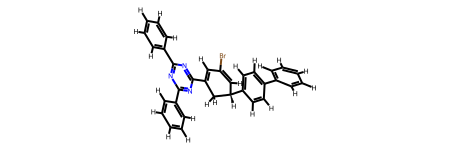

In [42]:
# mol_example = df.rdkit_mol_cistrans_stereo.iloc[6]# 0
mol_example = smiles_to_3d_mol(
    df.ID.iloc[6],
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol_example)

In [43]:
data = get_chiro_data_from_mol(mol_example)
display(data)

Data(x=[61, 52], edge_index=[2, 132], edge_attr=[132, 14], pos=[61, 3], bond_distances=[66], bond_distance_index=[2, 66], bond_angles=[108], bond_angle_index=[3, 108], dihedral_angles=[163], dihedral_angle_index=[4, 163])

### Do chemical transformation and information gathering

In [44]:
# make sure it is undirected
if not torch_geometric.utils.is_undirected(data.edge_index):
    edge_index, edge_attr = torch_geometric.utils.to_undirected(edge_index=data.edge_index, edge_attr=data.edge_attr)
else:
    edge_index, edge_attr = data.edge_index, data.edge_attr

In [45]:
# get chiralic centers
chiral_centers = Chem.FindMolChiralCenters(mol_example, includeUnassigned=True)
display(chiral_centers)

[(3, 'R')]

In [46]:
# Using GetStereo()
for b in mol_example.GetBonds():
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(),
          b.GetBondType(),b.GetStereo())

0 1 SINGLE STEREONONE
1 2 DOUBLE STEREONONE
2 3 SINGLE STEREONONE
3 4 SINGLE STEREONONE
4 5 AROMATIC STEREONONE
5 6 AROMATIC STEREONONE
6 7 AROMATIC STEREONONE
7 8 SINGLE STEREONONE
8 9 AROMATIC STEREONONE
9 10 AROMATIC STEREONONE
10 11 AROMATIC STEREONONE
11 12 AROMATIC STEREONONE
12 13 AROMATIC STEREONONE
7 14 AROMATIC STEREONONE
14 15 AROMATIC STEREONONE
3 16 SINGLE STEREONONE
16 17 SINGLE STEREONONE
17 18 SINGLE STEREONONE
18 19 AROMATIC STEREONONE
19 20 AROMATIC STEREONONE
20 21 SINGLE STEREONONE
21 22 AROMATIC STEREONONE
22 23 AROMATIC STEREONONE
23 24 AROMATIC STEREONONE
24 25 AROMATIC STEREONONE
25 26 AROMATIC STEREONONE
20 27 AROMATIC STEREONONE
27 28 AROMATIC STEREONONE
28 29 SINGLE STEREONONE
29 30 AROMATIC STEREONONE
30 31 AROMATIC STEREONONE
31 32 AROMATIC STEREONONE
32 33 AROMATIC STEREONONE
33 34 AROMATIC STEREONONE
28 35 AROMATIC STEREONONE
17 36 DOUBLE STEREONONE
36 1 SINGLE STEREONONE
15 4 AROMATIC STEREONONE
35 18 AROMATIC STEREONONE
13 8 AROMATIC STEREONONE
26 21 AR

In [47]:
for element in Chem.FindPotentialStereo(mol_example):
    print(f"Type: {element.type}, which: {element.centeredOn}, specified: {element.specified}, descriptor: {element.descriptor}, controllingAtoms: {element.controllingAtoms}, permutation: {element.permutation}")

Type: Atom_Tetrahedral, which: 3, specified: Specified, descriptor: Tet_CCW, controllingAtoms: <rdkit.rdBase._vectunsigned int object at 0x0000024FC4F8ED60>, permutation: 0


In [57]:
rings = mol_example.GetRingInfo()

for ring in rings.AtomRings():
    print(ring)

(13, 12, 11, 10, 9, 8)
(15, 14, 7, 6, 5, 4)
(26, 25, 24, 23, 22, 21)
(34, 33, 32, 31, 30, 29)
(35, 28, 27, 20, 19, 18)
(36, 17, 16, 3, 2, 1)


In [59]:
rings = mol_example.GetRingInfo()

for ring in rings.BondRings():
    print(ring)

(12, 11, 10, 9, 8, 39)
(14, 13, 6, 5, 4, 37)
(25, 24, 23, 22, 21, 40)
(33, 32, 31, 30, 29, 41)
(34, 27, 26, 19, 18, 38)
(35, 16, 15, 2, 1, 36)


In [ ]:
# transformation to edges and keep track of indices aka how to map index of current center to edge/new nodes

In [ ]:
# so... different modes
# 1: normally C but do something special for stereocenters aka Z (chienn but sometimes allow more stereoisomers)
# 2: not two nodes for each edge but make more complex permutation tree with P(Z,Z) or P(C,C)
# 3: enantiomer: on double edge (or specific stereo candidate) fuze two edges not to P(Z,Z), but make Z/C(1,2,3,4)
# 4: ext of 3: do so for normal edges too in case of rotamer. ==> catch condition that atoms not on one axis
# 5:      or: map both sides at once and if equal mapped then Z(P, P, P)